<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2023%20/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import scipy.signal as signal
import scipy.ndimage as nd

## Erosion

In [3]:
I = np.array([[0,0,1,1,0,1],[1,1,1,1,1,0],[0,1,1,1,1,1]])
print('Object')
print(I)
se = np.array([[0,1,0],[1,1,1],[0,1,0]])
print('SE')
print(se)
R = nd.binary_erosion(I,se).astype(np.int8)
print('Eroded Result')
print(R)

Object
[[0 0 1 1 0 1]
 [1 1 1 1 1 0]
 [0 1 1 1 1 1]]
SE
[[0 1 0]
 [1 1 1]
 [0 1 0]]
Eroded Result
[[0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]]


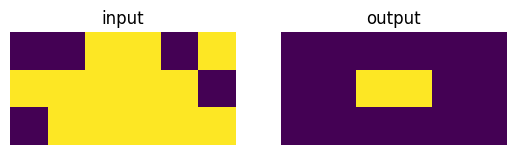

In [4]:
plt.subplot(121)
plt.imshow(I)
plt.axis('off')
plt.title('input')
plt.subplot(122)
plt.imshow(R)
plt.axis('off')
plt.title('output')
plt.show()

## Dilation

In [5]:
I = np.array([[0,0,1,1,0,0],[0,0,1,1,1,0],[0,0,0,1,0,0],[0,0,1,1,1,0],[0,0,0,0,0,0]])
print('Object')
print(I)
se = np.array([[0,1,0],[1,1,1],[0,1,0]])
print('SE')
print(se)
R = nd.binary_dilation(I,se).astype(np.int8)
print('Dilated Result')
print(R)

Object
[[0 0 1 1 0 0]
 [0 0 1 1 1 0]
 [0 0 0 1 0 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 0]]
SE
[[0 1 0]
 [1 1 1]
 [0 1 0]]
Dilated Result
[[0 1 1 1 1 0]
 [0 1 1 1 1 1]
 [0 0 1 1 1 0]
 [0 1 1 1 1 1]
 [0 0 1 1 1 0]]


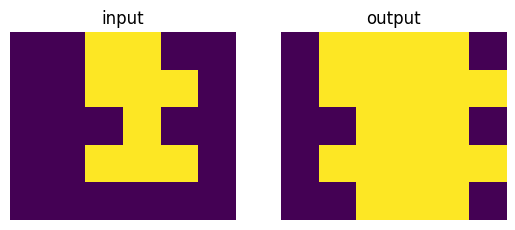

In [6]:
plt.subplot(121)
plt.imshow(I)
plt.axis('off')
plt.title('input')
plt.subplot(122)
plt.imshow(R)
plt.axis('off')
plt.title('output')
plt.show()

## Erosion

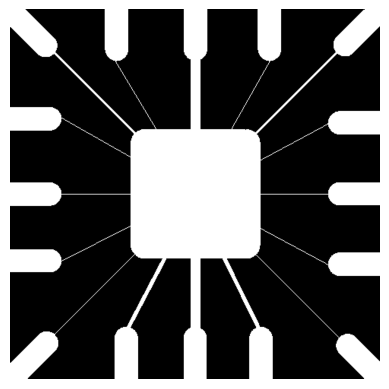

In [7]:
I = Image.open('circuitmask.tif').convert('L')
f = np.array(I)>0
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

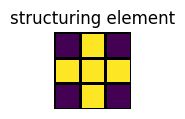

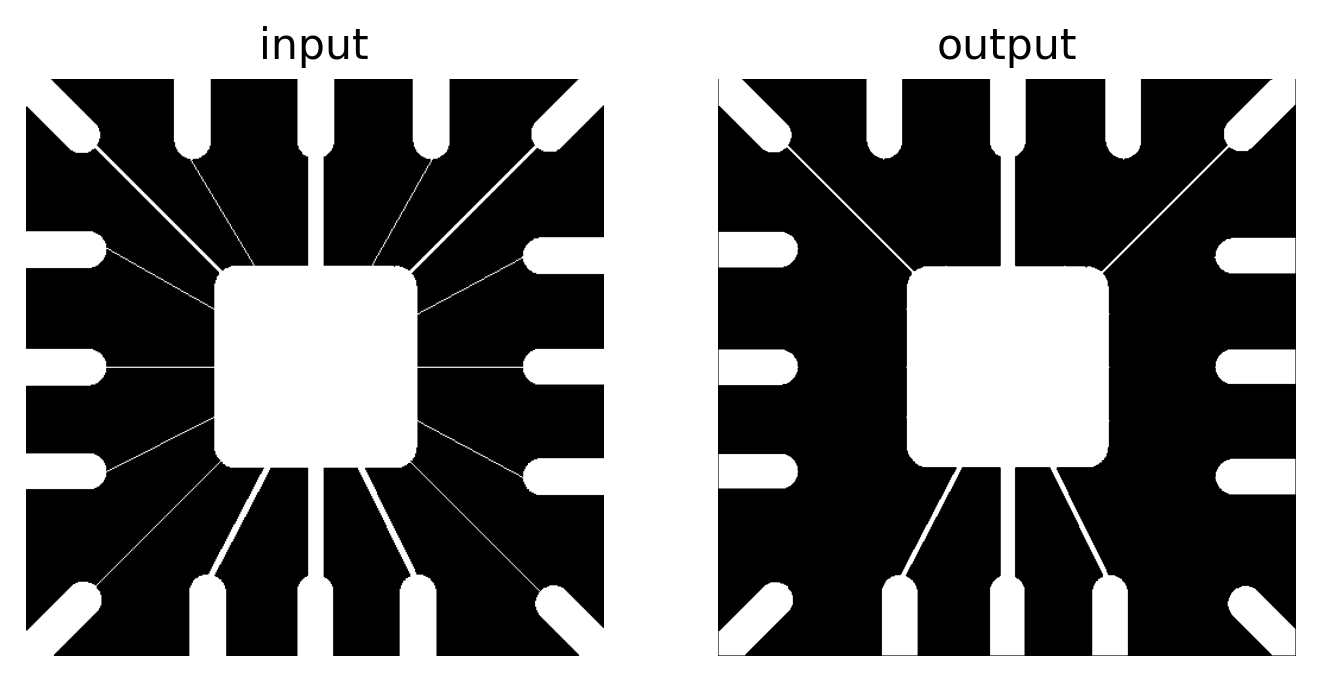

In [8]:
se = np.array([[0,1,0],[1,1,1],[0,1,0]])
plt.figure(figsize=(1,1))
plt.pcolormesh(se, edgecolors='k', linewidth=2)
plt.title('structuring element')
plt.axis('off')
plt.show()

g = nd.binary_erosion(f,se)

plt.figure(dpi=256)
plt.subplot(121)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.title('input')
plt.subplot(122)
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.title('output')
plt.show()

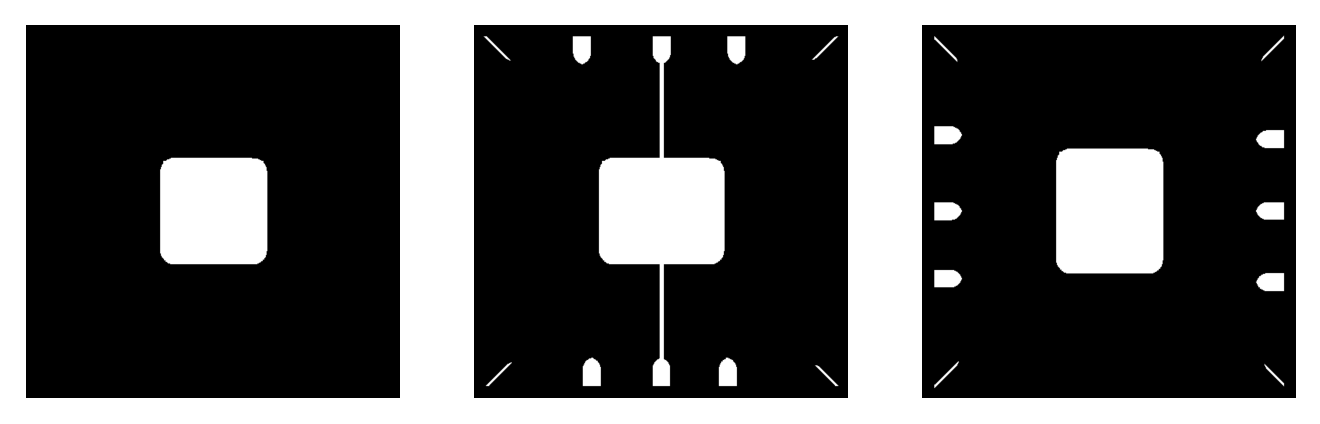

In [9]:
se1 = np.ones((64,64))
se2 = np.ones((64,16))
se3 = np.ones((16,64))

plt.figure(dpi=256)

g1 = nd.binary_erosion(f,se1)
plt.subplot(131)
plt.imshow(g1,cmap='gray')
plt.axis('off')

g2 = nd.binary_erosion(f,se2)
plt.subplot(132)
plt.imshow(g2,cmap='gray')
plt.axis('off')

g3 = nd.binary_erosion(f,se3)
plt.subplot(133)
plt.imshow(g3,cmap='gray')
plt.axis('off')

plt.show()

## Dilation

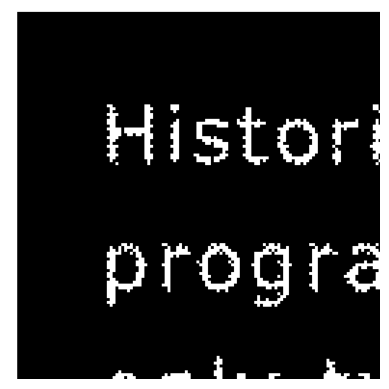

In [10]:
I = Image.open('text-broken.tif')
f = np.array(I)>0
f = f[:256,:256]
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

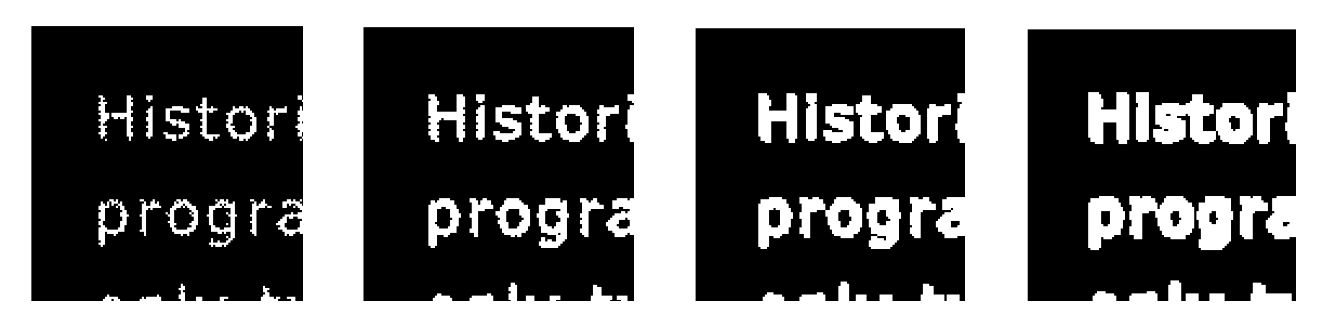

In [11]:
se1 = np.ones((3,3))
se2 = np.ones((5,5))
se3 = np.ones((7,7))

plt.figure(dpi=256)
plt.subplot(141)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.subplot(142)
g1 = nd.binary_dilation(f,se1)
plt.imshow(g1,cmap='gray')
plt.axis('off')
plt.subplot(143)
g2 = nd.binary_dilation(f,se2)
plt.imshow(g2,cmap='gray')
plt.axis('off')
plt.subplot(144)
g3 = nd.binary_dilation(f,se3)
plt.imshow(g3,cmap='gray')
plt.axis('off')
plt.show()


## Opening and Closing

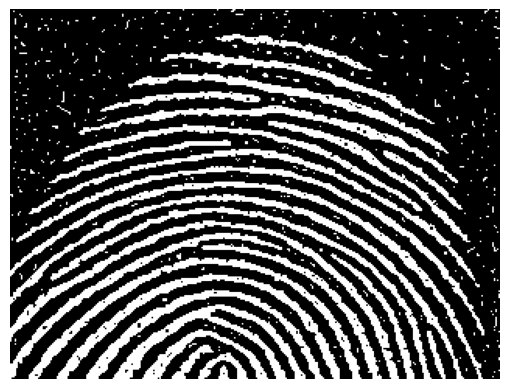

In [12]:
I = Image.open('fingerprint-noisy.tif').convert('L')
f = np.array(I)>0
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

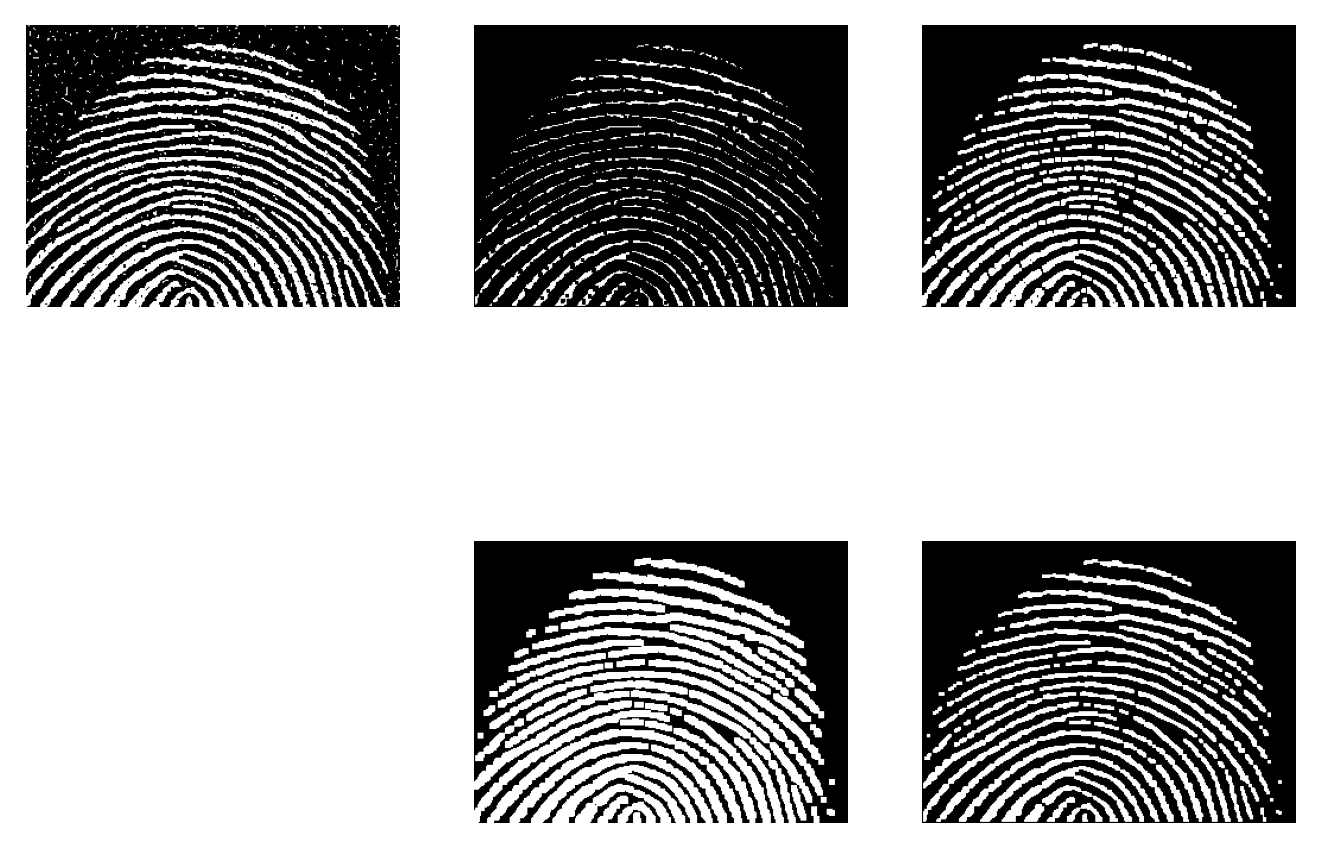

In [13]:
se = np.ones((3,3))
g1 = nd.binary_erosion(f,se)
g2 = nd.binary_dilation(g1,se)
g3 = nd.binary_dilation(g2,se)
g4 = nd.binary_erosion(g3,se)

plt.figure(dpi=256)
plt.subplot(231)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.subplot(232)
plt.imshow(g1,cmap='gray')
plt.axis('off')
plt.subplot(233)
plt.imshow(g2,cmap='gray')
plt.axis('off')
plt.subplot(235)
plt.imshow(g3,cmap='gray')
plt.axis('off')
plt.subplot(236)
plt.imshow(g4,cmap='gray')
plt.axis('off')
plt.show()



## Boundary Extraction

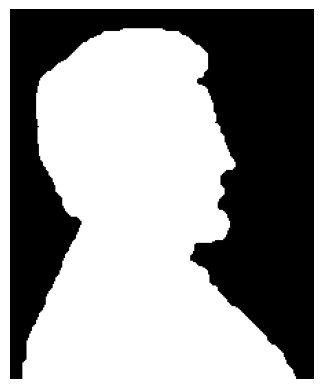

In [14]:
I = Image.open('lincoln.tif').convert('L')
f = np.array(I)>0
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

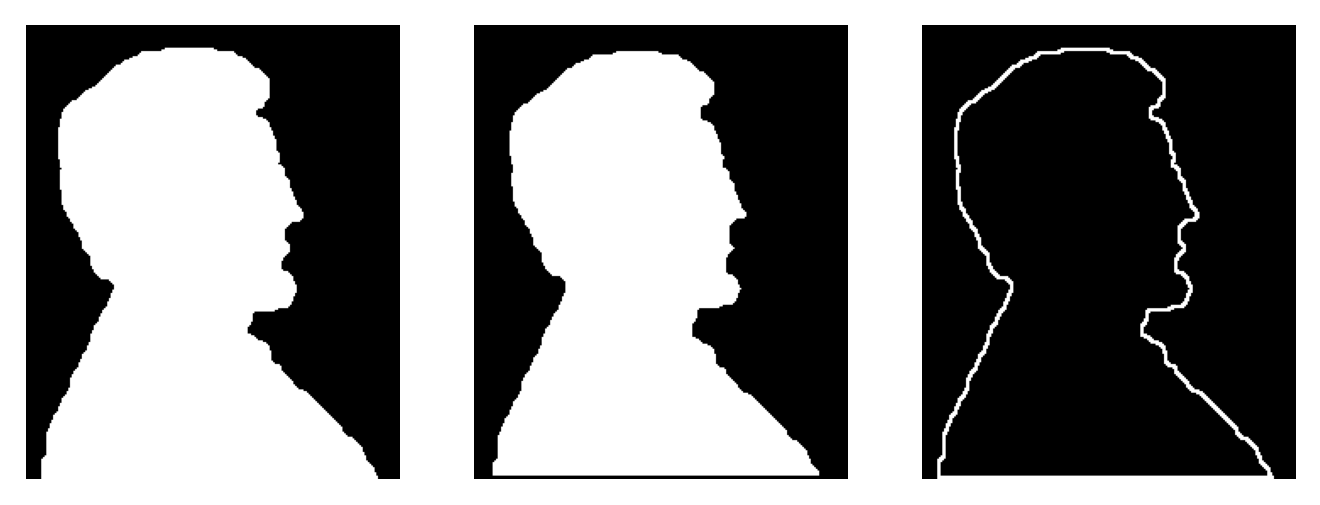

In [15]:
g = nd.binary_erosion(f,np.ones((5,5))).astype(np.int8)
e = f - g
plt.figure(dpi=256)
plt.subplot(131)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(e,cmap='gray')
plt.axis('off')
plt.show()

## Connected Components

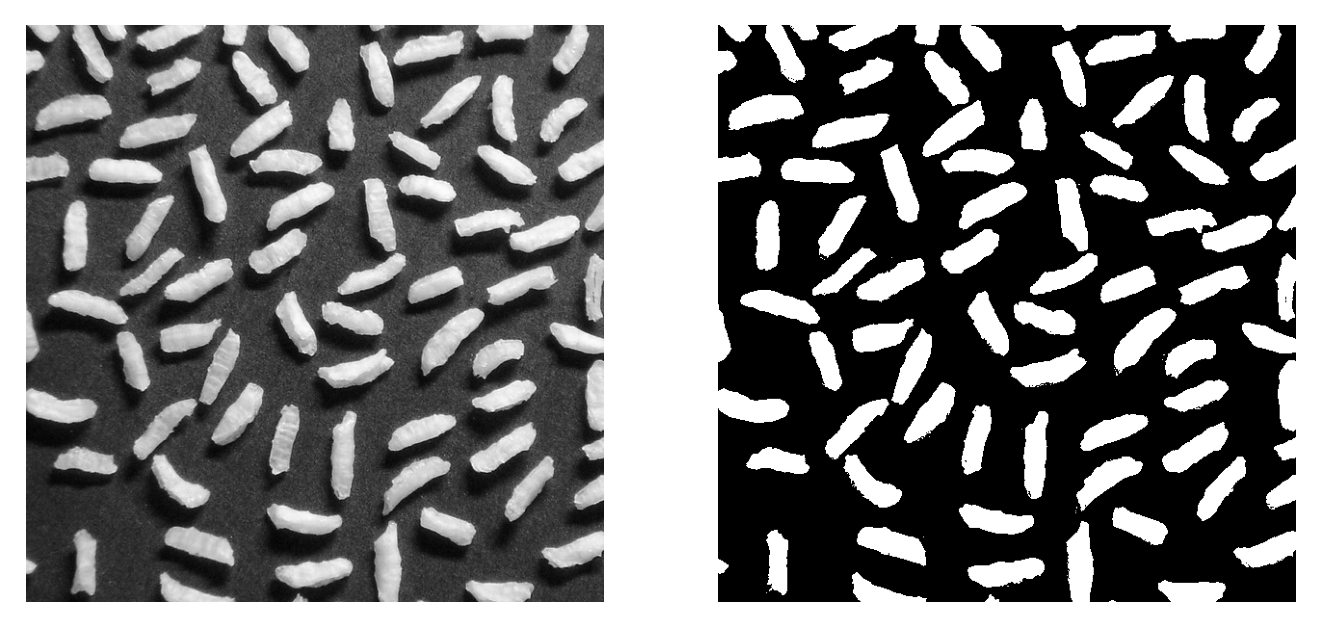

In [16]:
I = Image.open('rice.tif').convert('L')
f = np.array(I)
f2 = f>128
plt.figure(dpi=256)
plt.subplot(121)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(f2,cmap='gray')
plt.axis('off')
plt.show()


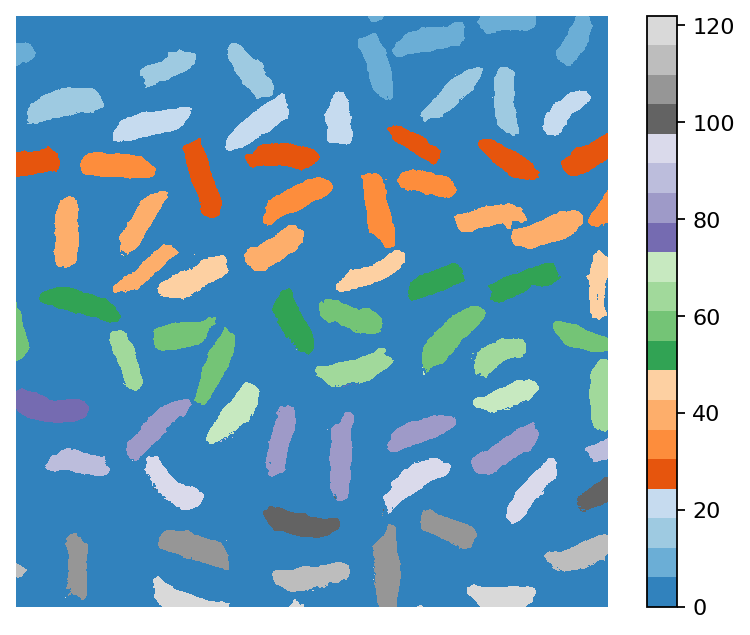

In [17]:
l, m = nd.label(f2)
plt.figure(dpi=160)
plt.imshow(l,interpolation='nearest',cmap='tab20c')
plt.axis('off')
plt.colorbar()
plt.show()


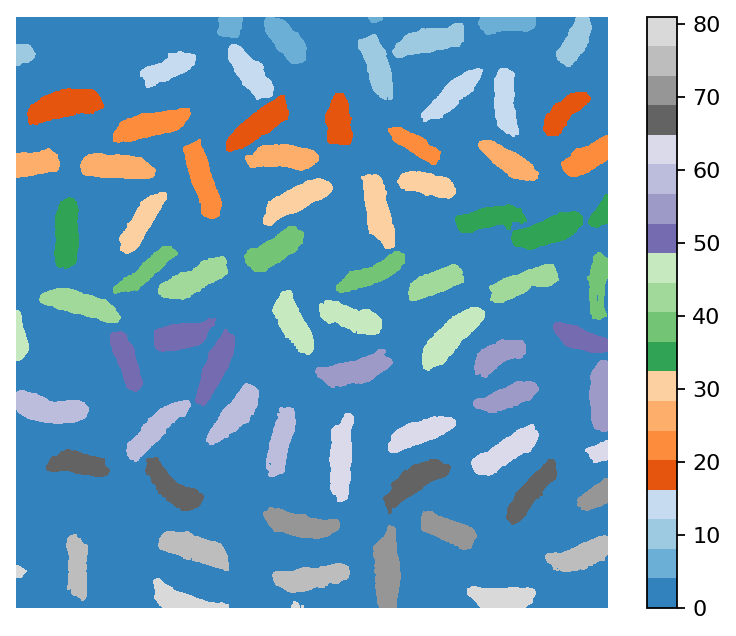

In [18]:
f3 = nd.binary_opening(f2, np.ones((3,3)))
l, m = nd.label(f3)
plt.figure(dpi=160)
plt.imshow(l,interpolation='nearest',cmap='tab20c')
plt.axis('off')
plt.colorbar()
plt.show()

In [19]:
cc = np.zeros((m-1,2))
for i in range(1,m):
  cc[i-1,0] = i
  cc[i-1,1] = np.sum(l==i)
  print(f'index: {int(cc[i-1,0])}, number of pixels: {int(cc[i-1,1])}')

index: 1, number of pixels: 406
index: 2, number of pixels: 1232
index: 3, number of pixels: 367
index: 4, number of pixels: 1177
index: 5, number of pixels: 492
index: 6, number of pixels: 1255
index: 7, number of pixels: 86
index: 8, number of pixels: 899
index: 9, number of pixels: 1113
index: 10, number of pixels: 1583
index: 11, number of pixels: 1397
index: 12, number of pixels: 358
index: 13, number of pixels: 1344
index: 14, number of pixels: 1111
index: 15, number of pixels: 1320
index: 16, number of pixels: 1343
index: 17, number of pixels: 1847
index: 18, number of pixels: 1103
index: 19, number of pixels: 1180
index: 20, number of pixels: 1647
index: 21, number of pixels: 1727
index: 22, number of pixels: 939
index: 23, number of pixels: 1160
index: 24, number of pixels: 1692
index: 25, number of pixels: 1237
index: 26, number of pixels: 1463
index: 27, number of pixels: 1009
index: 28, number of pixels: 1605
index: 29, number of pixels: 1141
index: 30, number of pixels: 16

In [20]:
ind_max = np.argmax(cc[:,1])
print(f'the largest component: index {int(ind_max)}, # of pixels: {int(cc[ind_max,1])}')
ind_min = np.argmin(cc[:,1])
print(f'the smallest component: index {int(ind_min)}, # of pixels: {int(cc[ind_min,1])}')

the largest component: index 46, # of pixels: 1875
the smallest component: index 79, # of pixels: 48


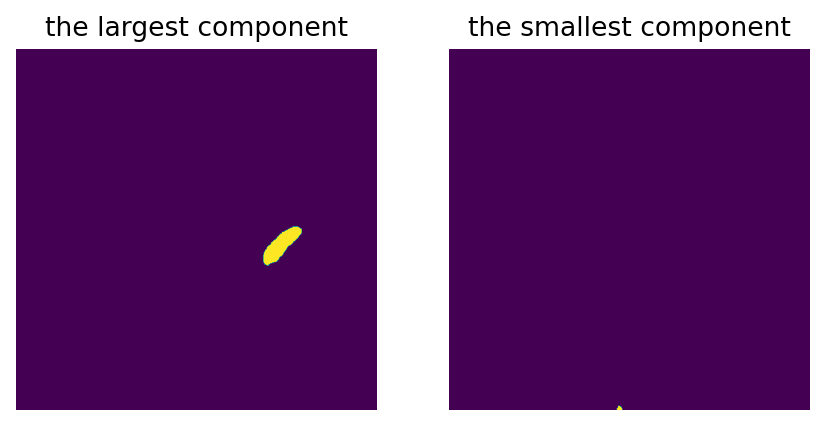

In [21]:
plt.figure(dpi=160)
plt.subplot(121)
plt.imshow(l==cc[ind_max,0])
plt.axis('off')
plt.title('the largest component')
plt.subplot(122)
plt.imshow(l==cc[ind_min,0])
plt.axis('off')
plt.title('the smallest component')
plt.show()